# The proportion of nosocomial infections that are caused by Methicillin Resistant Staphylococcus Aureus 

Importing numpy and pandas modules

In [87]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt 


# Exploratory Data Analysis

Getting an idea of the dataset's size, values etc. 

In [57]:
df = pd.read_csv('Healthcare_Associated_Infections-Hospital.csv')
print("df.shape:", df.shape)
print('df.index:', df.index)
print('df.values:', df.values)
print('df.ndim:', df.ndim)

df.shape: (174420, 15)
df.index: RangeIndex(start=0, stop=174420, step=1)
df.values: [['010001' 'SOUTHEAST HEALTH MEDICAL CENTER' '1108 ROSS CLARK CIRCLE' ...
  nan '07/01/2021' '06/30/2022']
 ['010001' 'SOUTHEAST HEALTH MEDICAL CENTER' '1108 ROSS CLARK CIRCLE' ...
  nan '07/01/2021' '06/30/2022']
 ['010001' 'SOUTHEAST HEALTH MEDICAL CENTER' '1108 ROSS CLARK CIRCLE' ...
  nan '07/01/2021' '06/30/2022']
 ...
 ['670319' 'TRINITY REGIONAL HOSPITAL SACHSE'
  '4750 PRESIDENT GEORGE BUSH HIGHWAY' ... '5' '07/01/2021' '06/30/2022']
 ['670319' 'TRINITY REGIONAL HOSPITAL SACHSE'
  '4750 PRESIDENT GEORGE BUSH HIGHWAY' ... '5' '07/01/2021' '06/30/2022']
 ['670319' 'TRINITY REGIONAL HOSPITAL SACHSE'
  '4750 PRESIDENT GEORGE BUSH HIGHWAY' ... '5' '07/01/2021' '06/30/2022']]
df.ndim: 2


# Data Cleaning

Create a dataframe that only includes columns I care about (i.e. Measure Name and Score)

In [58]:
df1 = df[['Measure Name', 'Score']]
df1

,Measure Name,Score
0,Central Line Associated Bloodstream Infection ...,0.404
1,Central Line Associated Bloodstream Infection ...,1.519
2,Central Line Associated Bloodstream Infection:...,10299
3,Central Line Associated Bloodstream Infection ...,10.874
4,Central Line Associated Bloodstream Infection ...,9
...,...,...
174415,Clostridium Difficile (C.Diff): Upper Confiden...,Not Available
174416,Clostridium Difficile (C.Diff): Patient Days,Not Available
174417,Clostridium Difficile (C.Diff): Predicted Cases,Not Available
174418,Clostridium Difficile (C.Diff): Observed Cases,Not Available


Get an idea of which rows should be eliminated. I'm only interested in observed cases, so I will remove rows for other sorts of data stored in this dataset.

In [59]:
df['Measure Name'].unique()

array(['Central Line Associated Bloodstream Infection (ICU + select Wards): Lower Confidence Limit',
       'Central Line Associated Bloodstream Infection (ICU + select Wards): Upper Confidence Limit',
       'Central Line Associated Bloodstream Infection: Number of Device Days',
       'Central Line Associated Bloodstream Infection (ICU + select Wards): Predicted Cases',
       'Central Line Associated Bloodstream Infection (ICU + select Wards): Observed Cases',
       'Central Line Associated Bloodstream Infection (ICU + select Wards)',
       'Catheter Associated Urinary Tract Infections (ICU + select Wards): Lower Confidence Limit',
       'Catheter Associated Urinary Tract Infections (ICU + select Wards): Upper Confidence Limit',
       'Catheter Associated Urinary Tract Infections (ICU + select Wards): Number of Urinary Catheter Days',
       'Catheter Associated Urinary Tract Infections (ICU + select Wards): Predicted Cases',
       'Catheter Associated Urinary Tract Infections 

Eliminating irrelevant rows

In [60]:
df2 = df1[(df1['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards): Lower Confidence Limit') &
              (df1['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards): Upper Confidence Limit') &
              (df1['Measure Name'] != 'Central Line Associated Bloodstream Infection: Number of Device Days') &
              (df1['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards): Predicted Cases') &
              (df1['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards)') &
              (df1['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Lower Confidence Limit') &
              (df1['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Upper Confidence Limit') &
              (df1['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Number of Urinary Catheter Days') &
              (df1['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Predicted Cases') &
              (df1['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards)') &
              (df1['Measure Name'] != 'SSI - Colon Surgery: Lower Confidence Limit') &
              (df1['Measure Name'] != 'SSI - Colon Surgery: Upper Confidence Limit') &
              (df1['Measure Name'] != 'SSI - Colon Surgery: Number of Procedures') &
              (df1['Measure Name'] != 'SSI - Colon Surgery: Predicted Cases') &
              (df1['Measure Name'] != 'SSI - Colon Surgery') &
              (df1['Measure Name'] != 'SSI - Abdominal Hysterectomy: Lower Confidence Limit') &
              (df1['Measure Name'] != 'SSI - Abdominal Hysterectomy: Upper Confidence Limit') &
              (df1['Measure Name'] != 'SSI - Abdominal Hysterectomy: Number of Procedures') &
              (df1['Measure Name'] != 'SSI - Abdominal Hysterectomy: Predicted Cases') &
              (df1['Measure Name'] != 'SSI - Abdominal Hysterectomy') &
              (df1['Measure Name'] != 'MRSA Bacteremia: Lower Confidence Limit') &
              (df1['Measure Name'] != 'MRSA Bacteremia: Upper Confidence Limit') &
              (df1['Measure Name'] != 'MRSA Bacteremia: Patient Days') &
              (df1['Measure Name'] != 'MRSA Bacteremia') &
              (df1['Measure Name'] != 'MRSA Bacteremia: Predicted Cases') &
              (df1['Measure Name'] != 'Clostridium Difficile (C.Diff): Lower Confidence Limit') &
              (df1['Measure Name'] != 'Clostridium Difficile (C.Diff): Upper Confidence Limit') &
              (df1['Measure Name'] != 'Clostridium Difficile (C.Diff): Patient Days') &
              (df1['Measure Name'] != 'Clostridium Difficile (C.Diff): Predicted Cases') &
              (df1['Measure Name'] != 'Clostridium Difficile (C.Diff)')]
              
df2.head

<bound method NDFrame.head of                                              Measure Name          Score
4       Central Line Associated Bloodstream Infection ...              9
10      Catheter Associated Urinary Tract Infections (...             10
16                    SSI - Colon Surgery: Observed Cases              5
22           SSI - Abdominal Hysterectomy: Observed Cases              1
28                        MRSA Bacteremia: Observed Cases              9
...                                                   ...            ...
174394  Catheter Associated Urinary Tract Infections (...  Not Available
174400                SSI - Colon Surgery: Observed Cases  Not Available
174406       SSI - Abdominal Hysterectomy: Observed Cases  Not Available
174412                    MRSA Bacteremia: Observed Cases  Not Available
174418     Clostridium Difficile (C.Diff): Observed Cases  Not Available

[29070 rows x 2 columns]>

Writing the desired dataframe to a csv to examine if it contains only the data I am concerned with

In [61]:
clean_df = pd.read_csv('HAI_cleandata.csv')
clean_df

,Unnamed: 0,Measure Name,Score
0,4,Central Line Associated Bloodstream Infection ...,9
1,10,Catheter Associated Urinary Tract Infections (...,10
2,16,SSI - Colon Surgery: Observed Cases,5
3,22,SSI - Abdominal Hysterectomy: Observed Cases,1
4,28,MRSA Bacteremia: Observed Cases,9
...,...,...,...
21760,174286,Catheter Associated Urinary Tract Infections (...,0
21761,174292,SSI - Colon Surgery: Observed Cases,0
21762,174298,SSI - Abdominal Hysterectomy: Observed Cases,0
21763,174304,MRSA Bacteremia: Observed Cases,0


# Conducting Calculations

Getting the sample size by summing the values in the Score column

In [62]:
n = clean_df['Score'].sum()

print('n =', n)

clean_df['Measure Name'].unique()


n = 100188


array(['Central Line Associated Bloodstream Infection (ICU + select Wards): Observed Cases',
       'Catheter Associated Urinary Tract Infections (ICU + select Wards): Observed Cases',
       'SSI - Colon Surgery: Observed Cases',
       'SSI - Abdominal Hysterectomy: Observed Cases',
       'MRSA Bacteremia: Observed Cases',
       'Clostridium Difficile (C.Diff): Observed Cases'], dtype=object)

Getting the # of successes (i.e. number of infections associated wifth MRSA) for hypothesis testing

In [63]:
df3 = clean_df[(clean_df['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Colon Surgery: Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Abdominal Hysterectomy: Observed Cases') &
               (clean_df['Measure Name'] != 'Clostridium Difficile (C.Diff): Observed Cases')]

mrsa_x = df3['Score'].sum()

mrsa_x

11281

The # of successes for CLABI

In [64]:
df4 = clean_df[(clean_df['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'MRSA Bacteremia: Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Colon Surgery: Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Abdominal Hysterectomy: Observed Cases') &
               (clean_df['Measure Name'] != 'Clostridium Difficile (C.Diff): Observed Cases')]

clabi_x = df4['Score'].sum()
clabi_x

18980

The # successes for CAUTI

In [65]:
df5 = clean_df[(clean_df['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'MRSA Bacteremia: Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Colon Surgery: Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Abdominal Hysterectomy: Observed Cases') &
               (clean_df['Measure Name'] != 'Clostridium Difficile (C.Diff): Observed Cases')]

cauti_x = df5['Score'].sum()
cauti_x

17543

The # successes for SSI - colon surgery

In [66]:
df6 = clean_df[(clean_df['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'MRSA Bacteremia: Observed Cases') &
               (clean_df['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Abdominal Hysterectomy: Observed Cases') &
               (clean_df['Measure Name'] != 'Clostridium Difficile (C.Diff): Observed Cases')]

ssicolon_x = df6['Score'].sum()
ssicolon_x 

7510

The # successes for SSI - abdominal hysterectomy 

In [67]:
df7 = clean_df[(clean_df['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'MRSA Bacteremia: Observed Cases') &
               (clean_df['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Colon Surgery: Observed Cases') &
               (clean_df['Measure Name'] != 'Clostridium Difficile (C.Diff): Observed Cases')]

ssiab_x = df7['Score'].sum()
ssiab_x

2042

The # successes for C. difficile 

In [68]:
df8 = clean_df[(clean_df['Measure Name'] != 'Central Line Associated Bloodstream Infection (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'MRSA Bacteremia: Observed Cases') &
               (clean_df['Measure Name'] != 'Catheter Associated Urinary Tract Infections (ICU + select Wards): Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Colon Surgery: Observed Cases') &
               (clean_df['Measure Name'] != 'SSI - Abdominal Hysterectomy: Observed Cases')]

cdiff_x = df8['Score'].sum()
cdiff_x

42832

Calculating proportions

In [69]:
#MRSA
prop_mrsa = mrsa_x/n
print('MRSA proportion:', prop_mrsa)

#Central Line Associated Bloodstream Infection 
prop_clabi = clabi_x/n
print('CLABI proportion:', prop_clabi) 

#Catheter Associated Urinary Tract Infections
prop_cauti = cauti_x/n
print('CAUTI proportion:', prop_cauti)

#SSI - Colon Surgery
prop_ssicolon = ssicolon_x/n
print('SSI - colon proportion:', prop_ssicolon)

#SSI - Abdominal Hysterectomy
prop_ssiab = ssiab_x/n
print('SSI - Abdominal:', prop_ssiab)

#Clostridium Difficile (C.Diff)
prop_cdiff = cdiff_x/n
print('CDF - Difficile:', prop_cdiff)

MRSA proportion: 0.11259831516748513
CLABI proportion: 0.18944384557032778
CAUTI proportion: 0.17510081047630455
SSI - colon proportion: 0.07495907693536152
SSI - Abdominal: 0.020381682437018406
CDF - Difficile: 0.4275162694135026


# Conducting the 1-proportion z-test

Conducting the z test for the proportion at an α=0.05 signifigance level

In [85]:
h0 = 0.31

proportions_ztest(count = mrsa_x, nobs = n, value = h0, alternative = 'larger', prop_var = h0)

#**NOTE** - all I know is that to make proportions_ztest work like it should (as in give you the same results as a TI-84 or CrunchIT would) you must set the prop_var 
#parameter to equal the value of the null hypothesis 


(-135.0993676756136, 1.0)

# Conclusions

z-statistic = -135.099<br> 
P-value = 1
α=0.05

P = 1.0 > α=0.05
so the null hypothesis is not rejected

There is not sufficient statistical evidence to conclude that the proportion of nosocomial infections that are caused by MRSA is greater than 0.31. 


# Data Visualization 

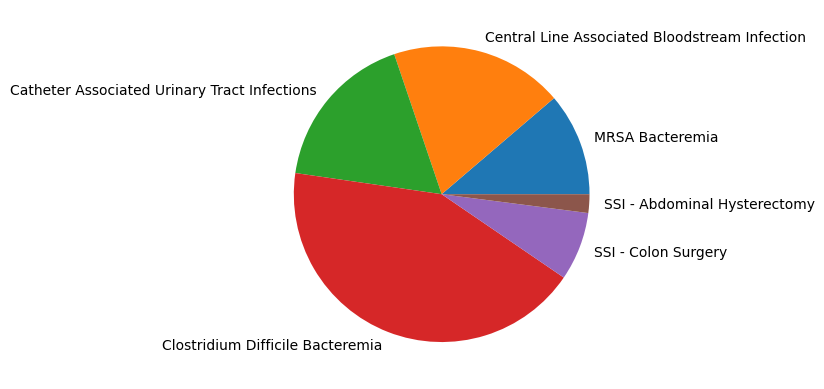

In [89]:
props = np.array([prop_mrsa, prop_clabi, prop_cauti, prop_cdiff, prop_ssicolon, prop_ssiab])
labl = ['MRSA Bacteremia', 'Central Line Associated Bloodstream Infection', 'Catheter Associated Urinary Tract Infections', 'Clostridium Difficile Bacteremia', 'SSI - Colon Surgery', 'SSI - Abdominal Hysterectomy']

plt.pie(props, labels = labl)
plt.show()